<span style="color:green">*Exercise 25*</span>

# Regresja Logistyczna zbudowany na bazie zmiennych Dummy_Variables

Istnieją dwa sposoby budowania modelu na zmiennych dyskretnych - 

<span style="color:green">***PYTANIE:*** czy model zbudowany na różnych metodach kodowania może mieć różne właściwości poredykcyjne?
</span> 

15 kwietnia 1912 r. Podczas swojej dziewiczej podróży Titanic zatonął po zderzeniu z górą lodową, Zginęło 1502 spośród 2224 pasażerów i załogi. Ta sensacyjna tragedia zszokowała społeczność międzynarodową i doprowadziła do lepszych przepisów bezpieczeństwa dla statków.
Jednym z powodów tragedii, był brak wystarczającej liczby łodzi ratunkowych. Zaobserwowano, że niektóre grupy ludzi miały większe szanse na przetrwanie niż inne. Były to kobiety, dzieci oraz klasa pierwsza.
Celem ćwiczenia jest określenia, jakie grupy pasażerów miały większe szanse przeżycia katastrofy. 


Nazwa zmiennej	Wartości	Opis

<span style="color:green">**Survived:**</span>
(0 = No, 1 = Yes)	Zmienna wynikowa określająca przeżycie
pclass: (1 = 1st, 2 = 2nd, 3 = 3rd) Klasa biletu

<span style="color:green">**Sex:**</span>
(male, female) płeć pasażera

<span style="color:green">**Age:**</span>
wiek pasażera w latach
Wiek jest ułamkowy, jeśli jest mniejszy niż 1. Jeżeli wiek jest szacowany, to czy ma on postać xx.5

<span style="color:green">**SibSp:**</span>
Liczba rodzeństwa / małżonków na pokładzie Titanica
Zestaw danych definiuje relacje rodzinne w ten sposób… Rodzeństwo = brat, siostra, przyrodni brat, przyrodnia siostra Współmałżonek = mąż, żona **(kochanki i narzeczone zostały zignorowane)**.

<span style="color:green">**Parch:**</span>
liczba rodziców / dzieci na pokładzie Titanica
Zestaw danych definiuje relacje rodzinne w ten sposób… Rodzic = matka, ojciec Dziecko = córka, syn, pasierbica, pasierb Niektóre dzieci podróżowały tylko z nianią, dlatego dla nich parch = 0.

<span style="color:green">**Ticket:**</span> 
numer biletu

<span style="color:green">**Fare:**</span>
opłata za bilet

<span style="color:green">**Cabin:**</span>
Numer kabiny

<span style="color:green">**Embarked:**</span>
(C = Cherbourg, Q = Queenstown, S = Southampton) Kod portu zaokrętowania.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

df = pd.read_csv('c:/1/kaggletrain.csv')
df.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sprawdzamy kompletnoiść danych

In [2]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.shape

(891, 13)

Naszym zadaniem jest porównanie dwóch metod tworzenia modeli regresji logistycznej. Kasujemy kolumnę 'Cabin' ponieważ w około 3/4 rekordów jest niekompletna poza tym ma zbyt wiele wartości unikalnych.  

In [4]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
del df['Cabin']
del df['Ticket']
del df['Unnamed: 0']
del df['PassengerId']

Usunąłem kolumnę Cabin, również usunąłem kolumnę 'Ticket', uważam że numer biletu nie miał wpływu na przeżywalnośc rejsu.
Teraz usunę rekordy gdzie brakuje wartości w kolumnach 'Embarked' oraz 'Age'.

In [6]:
df = df.dropna(how='any')

Sprawdzenie wyniku

In [7]:
df.shape

(712, 9)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Niekompletne rekordy zostały usunięte. Badam pozostałe zmienne niezależne.

In [9]:
df.Embarked.value_counts(normalize=True)

S    0.778090
C    0.182584
Q    0.039326
Name: Embarked, dtype: float64

In [10]:
df.Sex.value_counts(normalize=True)

male      0.636236
female    0.363764
Name: Sex, dtype: float64

Dość enigmatyczna jest zmienna SibSp, sprawdźmy ją!

In [11]:
df.SibSp.value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

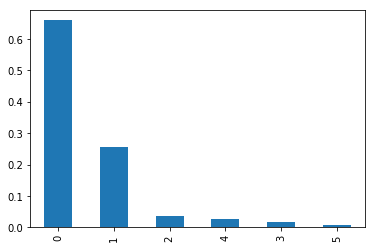

In [12]:
df.SibSp.value_counts(normalize=True).plot(kind='bar')

Tak ja widzimy, 469 pasażerów podróżowała samodzielnie a 183 z jednym członkiem rodziny. Przetwarzam liczby na oznaczenia tekstowe, które łatwiej zrozumieć.

In [13]:
fam = {0:'lone', 1:'couple', 2:'three members', 3:'four members', 4:'five members', 5:'six members'}  
df['SibSp'] = df['SibSp'].map(fam)

### Parch - Zestaw danych definiuje relacje rodzinne

In [14]:
df.Parch.value_counts()

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Ta zmienna jest zbyt trudna do interpretacji, dlatego przetworzę ją na wartość dyskretną.

In [15]:
df.Parch.dtype

dtype('int64')

In [16]:
family = {0:'lone', 1:'mother', 2:'father', 3:'daughter', 4:'son', 5:'stepdaughter', 6:'stepson'}  
df['Parch'] = df['Parch'].map(family)

Podmieniliśmy trudne oznaczenie rozin na oznaczenia bardziej przyjazne, sprawdźmy czy dobrze.

In [17]:
df['Parch'].head(5)

0    lone
1    lone
2    lone
3    lone
4    lone
Name: Parch, dtype: object

In [18]:
df[df.Parch=='daughter'][['Parch','Age', 'Sex', 'Name', 'SibSp']]

,Parch,Age,Sex,Name,SibSp
86,daughter,16.0,male,"Ford, Mr. William Neal",couple
437,daughter,24.0,female,"Richards, Mrs. Sidney (Emily Hocking)",three members
736,daughter,48.0,female,"Ford, Mrs. Edward (Margaret Ann Watson)",couple
774,daughter,54.0,female,"Hocking, Mrs. Elizabeth (Eliza Needs)",couple
858,daughter,24.0,female,"Baclini, Mrs. Solomon (Latifa Qurban)",lone


Jedena cureczka jest chłopcem. Pani Baclini jest córką innego pasażera, mimo to jest oznaczona jako podrużyująca samotnie. W bazie widać błędy.

In [19]:
df[df.Parch=='son'][['Parch','Age', 'Sex', 'Name', 'SibSp']]

,Parch,Age,Sex,Name,SibSp
167,son,45.0,female,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",couple
360,son,40.0,male,"Skoog, Mr. Wilhelm",couple
438,son,64.0,male,"Fortune, Mr. Mark",couple
567,son,29.0,female,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",lone


Dwa błędy. 

In [20]:
df[df.Parch=='mother'][['Parch','Age', 'Sex', 'Name', 'SibSp']].sample(5)

,Parch,Age,Sex,Name,SibSp
155,mother,51.0,male,"Williams, Mr. Charles Duane",lone
197,mother,42.0,male,"Olsen, Mr. Karl Siegwart Andreas",lone
328,mother,31.0,female,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",couple
853,mother,16.0,female,"Lines, Miss. Mary Conover",lone
24,mother,8.0,female,"Palsson, Miss. Torborg Danira",four members


In [21]:
df[df.Parch=='father'][['Parch','Age', 'Sex', 'Name', 'SibSp']].sample(5)

,Parch,Age,Sex,Name,SibSp
261,father,3.0,male,"Asplund, Master. Edvin Rojj Felix",five members
27,father,19.0,male,"Fortune, Mr. Charles Alexander",four members
318,father,31.0,female,"Wick, Miss. Mary Natalie",lone
63,father,4.0,male,"Skoog, Master. Harald",four members
850,father,4.0,male,"Andersson, Master. Sigvard Harald Elias",five members


Niektóre matki mają 9 lat inne 2. Część matek jest mężczyznami. Parametr 'SibSp' podający ilość towarzyszących członków rodziny dla niektórych rodziców wynosi zero . Wydaje mi się, że to oznaczenie jest błędne. Teraz nie będę tego poprawiał ponieważ nie mieści się to w ramach tego ćwiczenia. Zostawimy dane takimi jakie są.

## Analiza zbilansowania zbioru zmiennych wynikowych
Nie będę już badał zmiennych, sprawdzę tylko czy zmienna zależna jest zbilansowana. Czy liczba urtatowanych i ofiar jest podobna.

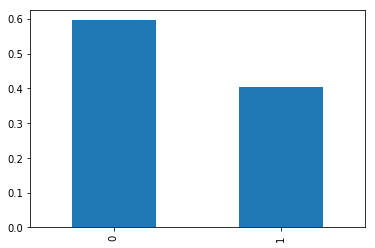

In [22]:
df.Survived.value_counts(normalize=True).plot(kind='bar')

Między zbiorami uratowanych i ofiar nie ma drastycznych różnic. Nie trzeba stosować oversampling. 

# Regresja logistyczna bez tworzenia Dummy Variables

Przy budowaniu każdego modelu trzeba brać pod uwagę wszystkie możliwe dane, również (a czasam przede wszystkim) dane tekstowe (dyskretne). Aby możliwe było użycie danych tekstowych, należy je przekształcić na dane cyfrowe. 
Dummy Variables to dane kategoryczne 0, 1, Z jednej kolumny tekstowej np. zwierzęta domowe, zawierającej np. trzy stany: pies, kot, mysz tworzy się trzy kolumny: zwierzęta domowe_kot, zwierzęta domowe_pies, zwierzęta domowe_mysz. Jeżeli w danym rekordzie jest kot, wartość w kolumnie zwierzęta domowe_kot = 1, w pozostałych kolumnach wartość ta wynosi 0.

Zamiast tworzyć Dummy Variables można styworzyć cyfrowy kod zmiennych tekstowych. Poniżej zrobimy takie przekształcenie dla zmiennych tekstowych. 


# Dzielimy zmienne niezależne na tekstowe i numeryczne

In [23]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

In [24]:
del df['Name']

In [25]:
categorical = df.describe(include=["object"]).columns
continuous = df.describe().columns

In [26]:
categorical

Index(['Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [27]:
continuous

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

## Przekształacamy zmienne dyskretne na zmienne kodowane cyfrowo

Ktoś może zapytać, po co najpierw tworzymy z danych cyfrowych 'SibSp' i 'Parch', zmienne tekstowe aby znowu przekształcić je w dane cyfrowe. 
Robimy tak aby poprawić czytelność kolumn w metodzie Dummy Variables.

In [28]:
from sklearn.preprocessing import LabelEncoder

df[categorical] = df[categorical].apply(LabelEncoder().fit_transform)

In [29]:
df[categorical].sample(6)

,Sex,SibSp,Parch,Embarked
703,1,3,2,1
700,0,0,2,0
302,1,3,2,2
640,1,3,2,2
132,0,0,2,2
271,1,3,2,2


## Dzielimy zbiory na testowe i treningowe

In [30]:
y = df['Survived']
X = df.drop('Survived' , axis=1)

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

Wielkości zbiorów.

In [31]:
print ('Training X set: ',Xtrain.shape)
print ('Test X set      ', Xtest.shape)
print ('Training y set: ', ytrain.shape)
print ('Test y set      ', ytest.shape)

Training X set:  (477, 7)
Test X set       (235, 7)
Training y set:  (477,)
Test y set       (235,)


In [32]:
Xtrain.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
715,3,1,19.0,3,2,7.65,2
543,2,1,32.0,0,2,26.00,2
748,1,1,19.0,0,2,53.10,2
357,2,0,38.0,3,2,13.00,2


# Logistic Regression bez Dummy Variables

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

# Ocena modelu regresji logistycznej bez Dummy Variables

In [34]:
ypred = LR_Grid.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[117,  23],
       [ 23,  72]], dtype=int64)

In [35]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.76      0.76      0.76        95

    accuracy                           0.80       235
   macro avg       0.80      0.80      0.80       235
weighted avg       0.80      0.80      0.80       235



In [36]:
print("Accuracy:    ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:   ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:      ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:    ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:     0.8
Precision:    0.76
Recall:       0.76
F1 score:     0.76


Usunięcie danych 'Name', 'Cabin','Ticket','Unnamed: 0', 'PassengerId' poprawiło nieznacznie dobroć modelu.

# Logistic Regression z Dummy Variables

Przywracamy kolumny zawierające zmienne tekstowe. Robimy tak żeby mieć identyczne dane jak przy Logistic Regression bez dummy variables.

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
df2 = pd.read_csv('c:/1/kaggletrain.csv', usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [39]:
df2 = df2.dropna(how='any')
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
fam = {0:'lone', 1:'couple', 2:'three members', 3:'four members', 4:'five members', 5:'six members'}  
df2['SibSp'] = df2['SibSp'].map(fam)

In [41]:
family = {0:'lone', 1:'mother', 2:'father', 3:'daughter', 4:'son', 5:'stepdaughter', 6:'stepson'}  
df2['Parch'] = df2['Parch'].map(family)

### Teraz tworzymy zmienne typu Dummy Variables

In [42]:
Dummy_Variables = pd.get_dummies(df2, columns=categorical, drop_first=True)
Dummy_Variables.sample(5)

,Survived,Pclass,Age,Fare,Sex_male,SibSp_five members,SibSp_four members,SibSp_lone,SibSp_six members,SibSp_three members,Parch_father,Parch_lone,Parch_mother,Parch_son,Parch_stepdaughter,Parch_stepson,Embarked_Q,Embarked_S
93,0,3,26.0,20.5750,1,0,0,0,0,0,1,0,0,0,0,0,0,1
713,0,3,29.0,9.4833,1,0,0,1,0,0,0,1,0,0,0,0,0,1
534,0,3,30.0,8.6625,0,0,0,1,0,0,0,1,0,0,0,0,0,1
442,0,3,25.0,7.7750,1,0,0,0,0,0,0,1,0,0,0,0,0,1
812,0,2,35.0,10.5000,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [43]:
Dummy_Variables.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_male', 'SibSp_five members',
       'SibSp_four members', 'SibSp_lone', 'SibSp_six members',
       'SibSp_three members', 'Parch_father', 'Parch_lone', 'Parch_mother',
       'Parch_son', 'Parch_stepdaughter', 'Parch_stepson', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [44]:
y = Dummy_Variables['Survived']
X = Dummy_Variables.drop('Survived', axis=1) 

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

In [45]:
Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Dummy_Variables = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Dummy_Variables.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

## Ocena modelu regresji logistycznej

In [46]:
ypred_DV = LR_Dummy_Variables.predict(Xtest)

co_matrix = metrics.confusion_matrix(ytest, ypred_DV)
co_matrix

array([[115,  25],
       [ 25,  70]], dtype=int64)

In [47]:
print(classification_report(ytest, ypred_DV)) 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       140
           1       0.74      0.74      0.74        95

    accuracy                           0.79       235
   macro avg       0.78      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235



In [48]:
print("Accuracy:    ",np.round(metrics.accuracy_score(ytest, ypred_DV), decimals=2))
print("Precision:   ",np.round(metrics.precision_score(ytest, ypred_DV), decimals=2))
print("Recall:      ",np.round(metrics.recall_score(ytest, ypred_DV), decimals=2))
print("F1 score:    ",np.round(metrics.f1_score(ytest, ypred_DV), decimals=2))

Accuracy:     0.79
Precision:    0.74
Recall:       0.74
F1 score:     0.74


<span style="color:green">***Odpowiedź:*** Model regresji logistycznej wykorzystujący zmienne takstowe zakodowane oraz Model regresji logistycznej wykorzystujący zmienne typu Dummy_Variables mają te same zdolności predykcyjne.</span>